### BEAM PROFILE WITH SCANNING SLIT BEAM PROFILER

Plotted data: clip_width_X & clip_width_Y

Processed 45 valid data points out of 45 files.
z = 40.0 mm, Width_x = 0.957 mm, Width_y = 0.909 mm
z = 40.5 mm, Width_x = 0.864 mm, Width_y = 0.830 mm
z = 41.0 mm, Width_x = 0.775 mm, Width_y = 0.752 mm
z = 41.5 mm, Width_x = 0.690 mm, Width_y = 0.670 mm
z = 42.0 mm, Width_x = 0.607 mm, Width_y = 0.589 mm
z = 42.5 mm, Width_x = 0.530 mm, Width_y = 0.511 mm
z = 43.0 mm, Width_x = 0.454 mm, Width_y = 0.438 mm
z = 43.5 mm, Width_x = 0.380 mm, Width_y = 0.370 mm
z = 44.0 mm, Width_x = 0.313 mm, Width_y = 0.301 mm
z = 44.5 mm, Width_x = 0.256 mm, Width_y = 0.241 mm
z = 45.0 mm, Width_x = 0.202 mm, Width_y = 0.188 mm
z = 45.5 mm, Width_x = 0.156 mm, Width_y = 0.146 mm
z = 46.0 mm, Width_x = 0.118 mm, Width_y = 0.115 mm
z = 46.1 mm, Width_x = 0.112 mm, Width_y = 0.112 mm
z = 46.2 mm, Width_x = 0.106 mm, Width_y = 0.106 mm
z = 46.3 mm, Width_x = 0.100 mm, Width_y = 0.101 mm
z = 46.4 mm, Width_x = 0.094 mm, Width_y = 0.096 mm
z = 46.5 mm, Width_x = 0.090 mm, Width_y = 0.092 mm
z = 46.6 mm, Wid

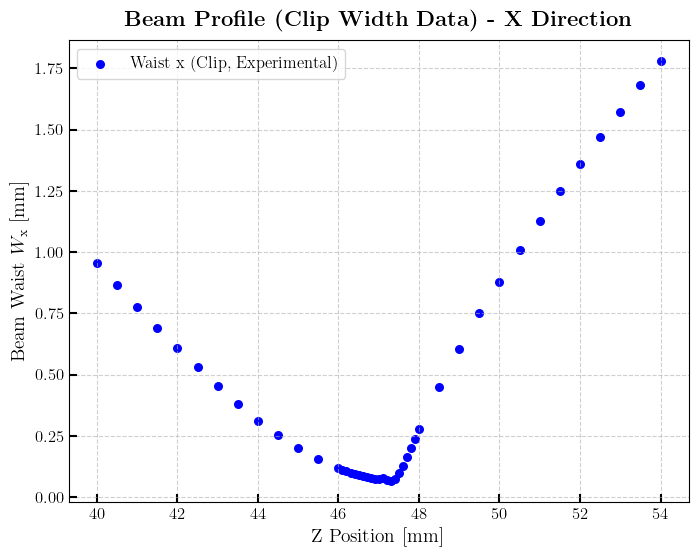

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_LB1471-C/fig/beam_profile_clip_y.png


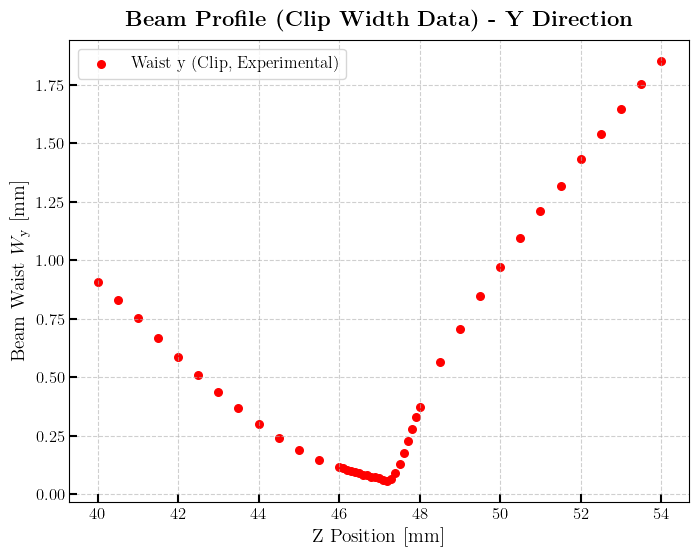

In [22]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_LB1471-C"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower()],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                # Check for "--" or invalid values before conversion
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    # Only append if valid data found
    if clip_width_x is not None and clip_width_y is not None:
        width_x.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values.append(z)  # Only append z if valid widths found
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert to numpy arrays
z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

# Sort by z_values
sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X (Clip): {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Clip, Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (Clip Width Data) - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_clip_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Clip, Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile (Clip Width Data) - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_clip_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Plotted data: gaussian_diameter_X & gaussian_diameter_Y

In [5]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_LB1471-C"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm_#001.txt")) 
                    if "before lens" not in os.path.basename(f).lower() and 
                    float(os.path.basename(f).split('mm')[0].strip()) <= 14],
                   key=lambda f: float(os.path.basename(f).split('mm')[0]))
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data
for file in file_list:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    gaussian_dia_x = None
    gaussian_dia_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                gaussian_dia_x = float(parts[19])
                gaussian_dia_y = float(parts[20])
            except (IndexError, ValueError) as e:
                print(f"Error parsing Gaussian diameters in {file}: {e}. Skipping.")
                continue
            break

    if gaussian_dia_x is None or gaussian_dia_y is None:
        print(f"Error: Could not find Gaussian diameters in {file}. Skipping.")
        continue

    z_values.append(z)
    width_x.append(gaussian_dia_x / 2 / 1000)  # Convert µm to mm, diameter to radius
    width_y.append(gaussian_dia_y / 2 / 1000)  # Convert µm to mm, diameter to radius

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

print(f"Processed {len(z_values)} valid data points out of {len(file_list)} files.")

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X: {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

Processed 0 valid data points out of 0 files.


ValueError: min() arg is an empty sequence

### BEAM PROFILE WITH CCAM DATA

z = 40.0 mm, Width_x = 1.327 mm, Width_y = 1.230 mm
z = 40.5 mm, Width_x = 1.226 mm, Width_y = 1.139 mm
z = 41.0 mm, Width_x = 1.127 mm, Width_y = 1.048 mm
z = 41.5 mm, Width_x = 1.028 mm, Width_y = 0.959 mm
z = 42.0 mm, Width_x = 0.931 mm, Width_y = 0.866 mm
z = 42.5 mm, Width_x = 0.832 mm, Width_y = 0.776 mm
z = 43.0 mm, Width_x = 0.735 mm, Width_y = 0.687 mm
z = 43.5 mm, Width_x = 0.639 mm, Width_y = 0.598 mm
z = 44.0 mm, Width_x = 0.545 mm, Width_y = 0.512 mm
z = 44.5 mm, Width_x = 0.453 mm, Width_y = 0.425 mm
z = 45.0 mm, Width_x = 0.368 mm, Width_y = 0.350 mm
z = 45.5 mm, Width_x = 0.295 mm, Width_y = 0.285 mm
z = 46.0 mm, Width_x = 0.236 mm, Width_y = 0.232 mm
z = 46.1 mm, Width_x = 0.227 mm, Width_y = 0.224 mm
z = 46.2 mm, Width_x = 0.219 mm, Width_y = 0.217 mm
z = 46.3 mm, Width_x = 0.211 mm, Width_y = 0.210 mm
z = 46.4 mm, Width_x = 0.204 mm, Width_y = 0.205 mm
z = 46.5 mm, Width_x = 0.198 mm, Width_y = 0.200 mm
z = 46.6 mm, Width_x = 0.193 mm, Width_y = 0.198 mm
z = 46.7 mm,

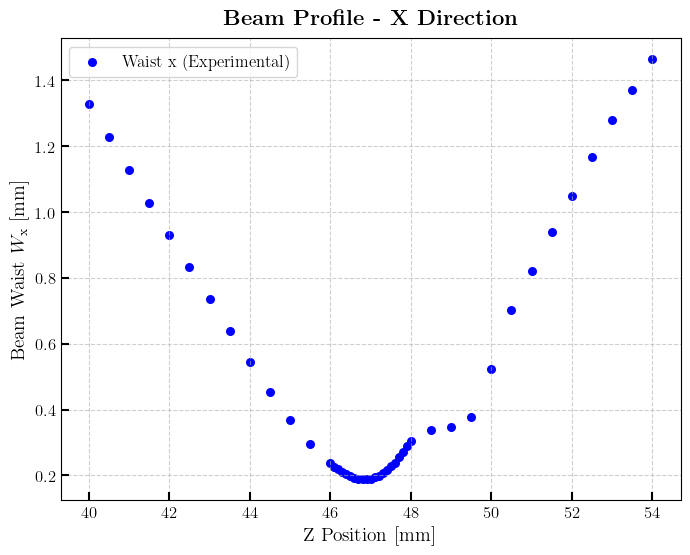

Saved: /Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_CMOS/fig/beam_profile_y.png


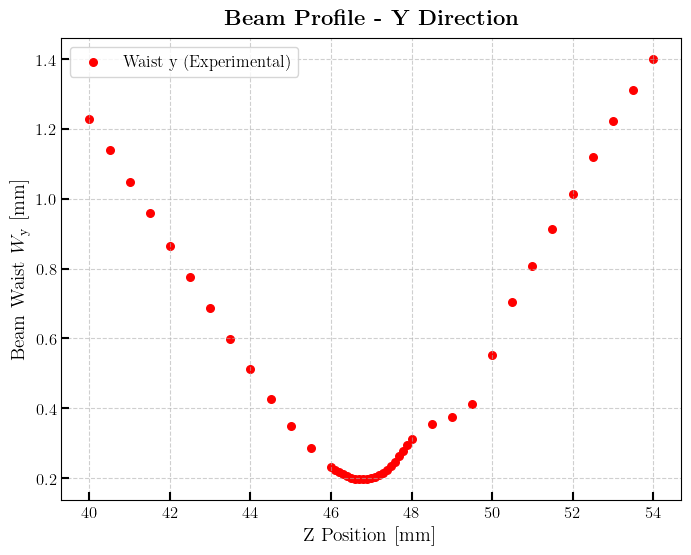

In [23]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data path
data_path = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_CMOS"
file_list = sorted([f for f in glob.glob(os.path.join(data_path, "*mm Beam Results.csv")) 
                    if "before lens" not in os.path.basename(f).lower()])
fig_dir = os.path.join(data_path, "fig")
os.makedirs(fig_dir, exist_ok=True)

z_values = []
width_x = []
width_y = []

# Extract data from files:
for file in file_list:
    filename = os.path.basename(file)
    # Handle float z-values (e.g., "40.5mm Beam Results.csv")
    z_str = filename.split('mm')[0].strip()  
    z = float(z_str)  # Changed from int() to float()
    z_values.append(z)

    with open(file, 'r') as f:
        lines = f.readlines()

    for i, line in enumerate(lines):
        if "Width x" in line:
            width_x.append(float(line.split()[2])/2)  
        if "Width y" in line:
            width_y.append(float(line.split()[2])/2)  

z_values = np.array(z_values)
width_x = np.array(width_x)
width_y = np.array(width_y)

sorted_indices = np.argsort(z_values)
z_values = z_values[sorted_indices]
width_x = width_x[sorted_indices]
width_y = width_y[sorted_indices]

# Print data
for z, wx, wy in zip(z_values, width_x, width_y):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Conversion (mm to um) for the min waist values
min_waist_exp_x = min(width_x) * 1000
min_waist_exp_y = min(width_y) * 1000

print("\nBEAM WAIST SUMMARY")
print(f"Experimental:")
print(f"  Min Waist X: {min_waist_exp_x:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y:.2f} μm")

# Plot Width x vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_x, color='b', label='Waist x (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - X Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_x = os.path.join(fig_dir, "beam_profile_x.png")
plt.savefig(save_beam_x, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_x}")
plt.show()

# Plot Width y vs. z 
plt.figure(figsize=(8, 6))
plt.scatter(z_values, width_y, color='r', label='Waist y (Experimental)', marker='o', s=30)
plt.xlabel(r'Z Position [mm]', fontsize=14)
plt.ylabel(r'Beam Waist $W_{\rm{y}}$ [mm]', fontsize=14)
plt.title(r'\textbf{Beam Profile - Y Direction}', fontsize=16, fontweight='bold', pad=10)
plt.legend(loc='upper left', fontsize=12, frameon=True)
plt.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
plt.grid(True, linestyle='--', alpha=0.6)
save_beam_y = os.path.join(fig_dir, "beam_profile_y.png")
plt.savefig(save_beam_y, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_beam_y}")
plt.show()

### COMPARISON

CMOS Data:
Processed 45 valid data points out of 45 files.
z = 40.0 mm, Width_x = 1.327 mm, Width_y = 1.230 mm
z = 40.5 mm, Width_x = 1.226 mm, Width_y = 1.139 mm
z = 41.0 mm, Width_x = 1.127 mm, Width_y = 1.048 mm
z = 41.5 mm, Width_x = 1.028 mm, Width_y = 0.959 mm
z = 42.0 mm, Width_x = 0.931 mm, Width_y = 0.866 mm
z = 42.5 mm, Width_x = 0.832 mm, Width_y = 0.776 mm
z = 43.0 mm, Width_x = 0.735 mm, Width_y = 0.687 mm
z = 43.5 mm, Width_x = 0.639 mm, Width_y = 0.598 mm
z = 44.0 mm, Width_x = 0.545 mm, Width_y = 0.512 mm
z = 44.5 mm, Width_x = 0.453 mm, Width_y = 0.425 mm
z = 45.0 mm, Width_x = 0.368 mm, Width_y = 0.350 mm
z = 45.5 mm, Width_x = 0.295 mm, Width_y = 0.285 mm
z = 46.0 mm, Width_x = 0.236 mm, Width_y = 0.232 mm
z = 46.1 mm, Width_x = 0.227 mm, Width_y = 0.224 mm
z = 46.2 mm, Width_x = 0.219 mm, Width_y = 0.217 mm
z = 46.3 mm, Width_x = 0.211 mm, Width_y = 0.210 mm
z = 46.4 mm, Width_x = 0.204 mm, Width_y = 0.205 mm
z = 46.5 mm, Width_x = 0.198 mm, Width_y = 0.200 mm
z = 4

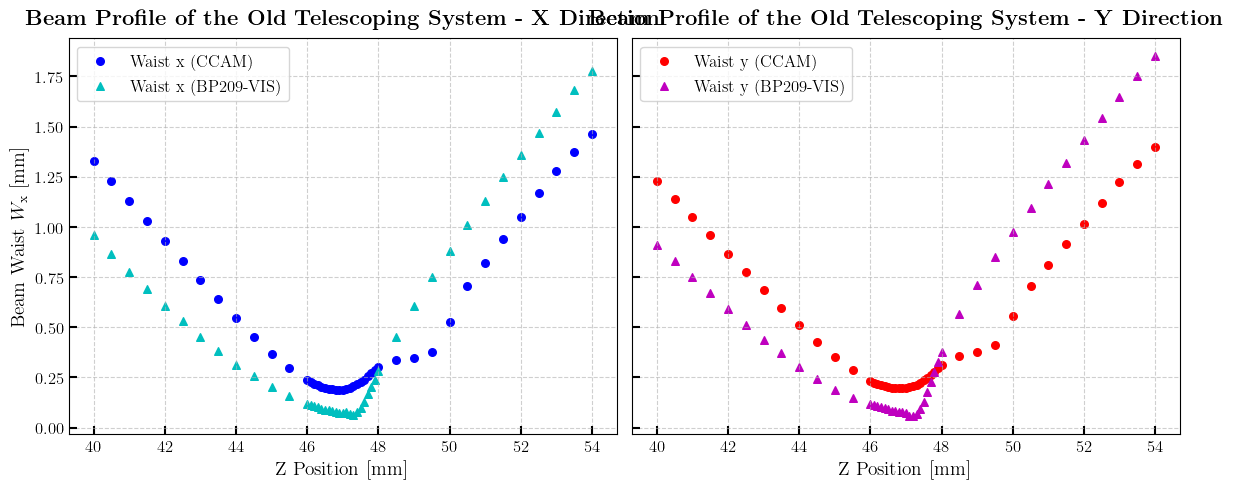

In [2]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data paths
data_path_cmos = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_CMOS"
data_path_lb1471 = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_LB1471-C"
fig_dir = os.path.join(data_path_cmos, "fig_comparison")
os.makedirs(fig_dir, exist_ok=True)

# CMOS data
file_list_cmos = sorted([f for f in glob.glob(os.path.join(data_path_cmos, "*mm Beam Results.csv")) 
                         if "before lens" not in os.path.basename(f).lower()])
z_values_cmos = []
width_x_cmos = []
width_y_cmos = []

# Extract CMOS data
for file in file_list_cmos:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    z_values_cmos.append(z)

    with open(file, 'r') as f:
        lines = f.readlines()

    for line in lines:
        if "Width x" in line:
            width_x_cmos.append(float(line.split()[2])/2)
        if "Width y" in line:
            width_y_cmos.append(float(line.split()[2])/2)

# Convert CMOS data to numpy arrays and sort
z_values_cmos = np.array(z_values_cmos)
width_x_cmos = np.array(width_x_cmos)
width_y_cmos = np.array(width_y_cmos)
sorted_indices_cmos = np.argsort(z_values_cmos)
z_values_cmos = z_values_cmos[sorted_indices_cmos]
width_x_cmos = width_x_cmos[sorted_indices_cmos]
width_y_cmos = width_y_cmos[sorted_indices_cmos]

# LB1471-C data
file_list_lb1471 = sorted([f for f in glob.glob(os.path.join(data_path_lb1471, "*mm_#001.txt")) 
                           if "before lens" not in os.path.basename(f).lower()],
                          key=lambda f: float(os.path.basename(f).split('mm')[0]))
z_values_lb1471 = []
width_x_lb1471 = []
width_y_lb1471 = []

# Extract LB1471-C data
for file in file_list_lb1471:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    if clip_width_x is not None and clip_width_y is not None:
        width_x_lb1471.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y_lb1471.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values_lb1471.append(z)
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert LB1471-C data to numpy arrays and sort
z_values_lb1471 = np.array(z_values_lb1471)
width_x_lb1471 = np.array(width_x_lb1471)
width_y_lb1471 = np.array(width_y_lb1471)
sorted_indices_lb1471 = np.argsort(z_values_lb1471)
z_values_lb1471 = z_values_lb1471[sorted_indices_lb1471]
width_x_lb1471 = width_x_lb1471[sorted_indices_lb1471]
width_y_lb1471 = width_y_lb1471[sorted_indices_lb1471]

# Print data
print("CMOS Data:")
print(f"Processed {len(z_values_cmos)} valid data points out of {len(file_list_cmos)} files.")
for z, wx, wy in zip(z_values_cmos, width_x_cmos, width_y_cmos):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nLB1471-C Data:")
print(f"Processed {len(z_values_lb1471)} valid data points out of {len(file_list_lb1471)} files.")
for z, wx, wy in zip(z_values_lb1471, width_x_lb1471, width_y_lb1471):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

# Min waist values
min_waist_exp_x_cmos = min(width_x_cmos) * 1000
min_waist_exp_y_cmos = min(width_y_cmos) * 1000
min_waist_exp_x_lb1471 = min(width_x_lb1471) * 1000
min_waist_exp_y_lb1471 = min(width_y_lb1471) * 1000

print("\nBEAM WAIST SUMMARY")
print("CMOS Experimental:")
print(f"  Min Waist X: {min_waist_exp_x_cmos:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y_cmos:.2f} μm")
print("LB1471-C Experimental:")
print(f"  Min Waist X (Clip): {min_waist_exp_x_lb1471:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y_lb1471:.2f} μm")

# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Width x comparison
ax1.scatter(z_values_cmos, width_x_cmos, color='b', label='Waist x (CCAM)', marker='o', s=30)
ax1.scatter(z_values_lb1471, width_x_lb1471, color='c', label='Waist x (BP209-VIS)', marker='^', s=30)
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile of the Old Telescoping System - X Direction}', fontsize=16, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=12, frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot Width y comparison
ax2.scatter(z_values_cmos, width_y_cmos, color='r', label='Waist y (CCAM)', marker='o', s=30)
ax2.scatter(z_values_lb1471, width_y_lb1471, color='m', label='Waist y (BP209-VIS)', marker='^', s=30)
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile of the Old Telescoping System - Y Direction}', fontsize=16, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=12, frameon=True)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_comparison.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()

QPD quadA - Z position: 38.0 mm, Beam waist (DC): 117.09 µm
QPD quadA - Z position: 37.8 mm, Beam waist (DC): 107.51 µm
QPD quadA - Z position: 37.6 mm, Beam waist (DC): 96.75 µm
QPD quadA - Z position: 37.4 mm, Beam waist (DC): 88.47 µm
QPD quadA - Z position: 37.2 mm, Beam waist (DC): 79.20 µm
QPD quadA - Z position: 37.0 mm, Beam waist (DC): 71.68 µm
QPD quadA - Z position: 36.9 mm, Beam waist (DC): 68.09 µm
QPD quadA - Z position: 36.8 mm, Beam waist (DC): 63.99 µm
QPD quadA - Z position: 36.7 mm, Beam waist (DC): 60.01 µm
QPD quadA - Z position: 36.6 mm, Beam waist (DC): 57.26 µm
QPD quadA - Z position: 36.5 mm, Beam waist (DC): 53.96 µm
QPD quadA - Z position: 36.4 mm, Beam waist (DC): 51.29 µm
QPD quadA - Z position: 36.3 mm, Beam waist (DC): 48.58 µm
QPD quadA - Z position: 36.2 mm, Beam waist (DC): 46.34 µm
QPD quadA - Z position: 36.1 mm, Beam waist (DC): 44.41 µm
QPD quadA - Z position: 36.0 mm, Beam waist (DC): 42.52 µm
QPD quadA - Z position: 35.9 mm, Beam waist (DC): 41.7

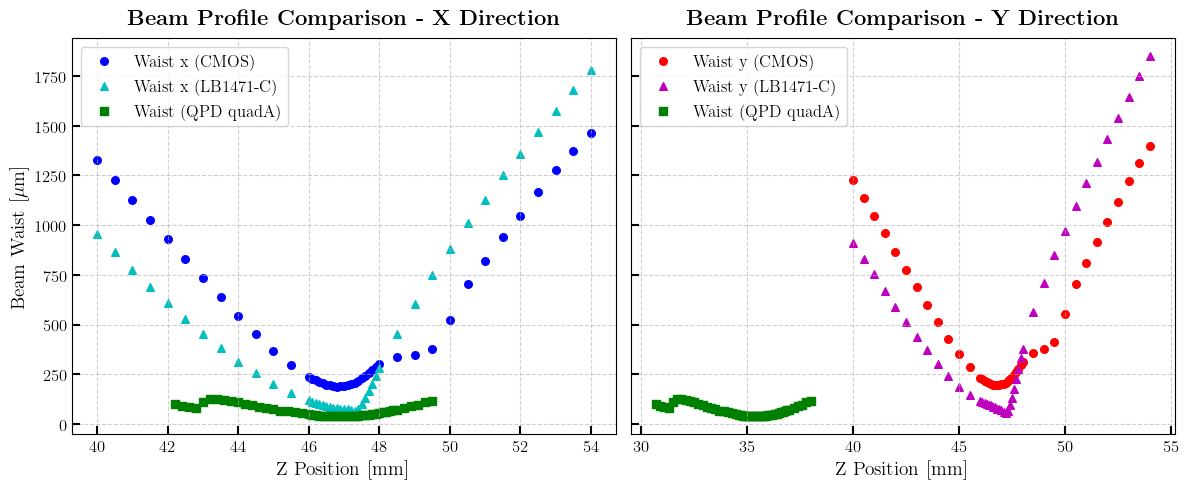

In [ ]:
import os
import glob
import pickle
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.optimize import curve_fit
from scipy.special import erf

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Error function for curve fitting (from third script)
def erf_model(x, A, B, C, D):
    return A * erf(B * (x - C)) + D

# Data paths
data_path_cmos = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_CMOS"
data_path_lb1471 = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_LB1471-C"
data_path_qpd = "/Users/asca/Documents/University/Master Thesis/code/Data/VIGO17_NS089008_QPD_0750_20_AS_015_CC_asca_250617_focus_laser_thres_LB1471C_quadA/Y6100um"
fig_dir = os.path.join(data_path_cmos, "fig_comparison")
os.makedirs(fig_dir, exist_ok=True)

# CMOS data
file_list_cmos = sorted([f for f in glob.glob(os.path.join(data_path_cmos, "*mm Beam Results.csv")) 
                         if "before lens" not in os.path.basename(f).lower()])
z_values_cmos = []
width_x_cmos = []
width_y_cmos = []

# Extract CMOS data
for file in file_list_cmos:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    z_values_cmos.append(z)

    with open(file, 'r') as f:
        lines = f.readlines()

    for line in lines:
        if "Width x" in line:
            width_x_cmos.append(float(line.split()[2])/2)  # mm, radius
        if "Width y" in line:
            width_y_cmos.append(float(line.split()[2])/2)  # mm, radius

# Convert CMOS data to numpy arrays and sort
z_values_cmos = np.array(z_values_cmos)
width_x_cmos = np.array(width_x_cmos)
width_y_cmos = np.array(width_y_cmos)
sorted_indices_cmos = np.argsort(z_values_cmos)
z_values_cmos = z_values_cmos[sorted_indices_cmos]
width_x_cmos = width_x_cmos[sorted_indices_cmos]
width_y_cmos = width_y_cmos[sorted_indices_cmos]

# LB1471-C data
file_list_lb1471 = sorted([f for f in glob.glob(os.path.join(data_path_lb1471, "*mm_#001.txt")) 
                           if "before lens" not in os.path.basename(f).lower()],
                          key=lambda f: float(os.path.basename(f).split('mm')[0]))
z_values_lb1471 = []
width_x_lb1471 = []
width_y_lb1471 = []

# Extract LB1471-C data
for file in file_list_lb1471:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    if clip_width_x is not None and clip_width_y is not None:
        width_x_lb1471.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y_lb1471.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values_lb1471.append(z)
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert LB1471-C data to numpy arrays and sort
z_values_lb1471 = np.array(z_values_lb1471)
width_x_lb1471 = np.array(width_x_lb1471)
width_y_lb1471 = np.array(width_y_lb1471)
sorted_indices_lb1471 = np.argsort(z_values_lb1471)
z_values_lb1471 = z_values_lb1471[sorted_indices_lb1471]
width_x_lb1471 = width_x_lb1471[sorted_indices_lb1471]
width_y_lb1471 = width_y_lb1471[sorted_indices_lb1471]

# QPD quadA data
file_list_qpd = sorted(glob.glob(os.path.join(data_path_qpd, "*.pkl")))
z_values_qpd = []
beam_waist_qpd = []

# Function to extract Z position from QPD filenames
def extract_z_position(file_path):
    match = re.search(r'Z(\d+)um', file_path)
    if match:
        z_um = int(match.group(1))  # Z position in µm
        z_mm = z_um / 1000  # Convert to mm
        return z_mm
    return None

# Function to load QPD data
def load_data(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

# Extract QPD quadA beam waist
for file in file_list_qpd:
    z_mm = extract_z_position(file)
    if z_mm is None:
        print(f"Could not extract Z position from {file}. Skipping.")
        continue

    data = load_data(file)
    xstart = data['global_params']['xstart_um']
    xstop = data['global_params']['xstop_um']
    xstep_big = data['global_params']['xstep_big_um']
    xstep_fine = data['global_params']['xstep_fine_um']
    x_threshold_start = data['global_params']['x_threshold_start_um']
    x_threshold_stop = data['global_params']['x_threshold_stop_um']

    x_array = []
    x_current = xstart
    while x_current <= xstop:
        if x_threshold_start <= x_current <= x_threshold_stop:
            x_array.append(x_current)
            x_current += xstep_fine
        else:
            x_array.append(x_current)
            x_current += xstep_big
    pos_array = np.array(x_array)

    segn = 'quadA'
    if segn in data['rawdata'] and 'dmm00_curr_amp' in data['rawdata'][segn]:
        dc_curr_avg = np.mean(data['rawdata'][segn]['dmm00_curr_amp'], axis=1)
        if len(pos_array) != len(dc_curr_avg):
            print(f"Error: pos_array and dc_curr_avg length mismatch for {file}, segment {segn}.")
            continue
        initial_guess_dc = [np.max(dc_curr_avg) / 2, 0.01, np.mean(pos_array), np.min(dc_curr_avg)]
        try:
            params_dc, _ = curve_fit(erf_model, pos_array, dc_curr_avg, p0=initial_guess_dc)
            A_fit_dc, B_fit_dc, x0_fit_dc, C_fit_dc = params_dc
            spot_size_dc = 1 / (np.sqrt(2) * B_fit_dc)  # Beam waist in µm
            z_values_qpd.append(z_mm)
            beam_waist_qpd.append(spot_size_dc)
            print(f"QPD quadA - Z position: {z_mm:.1f} mm, Beam waist (DC): {spot_size_dc:.2f} µm")
        except RuntimeError:
            print(f"DC Fit failed for {file}, segment {segn}. Skipping.")
            continue
    else:
        print(f"Warning: No data for {segn} in {file}")

# Convert QPD data to numpy arrays and sort
z_values_qpd = np.array(z_values_qpd)
beam_waist_qpd = np.array(beam_waist_qpd)
sorted_indices_qpd = np.argsort(z_values_qpd)
z_values_qpd = z_values_qpd[sorted_indices_qpd]
beam_waist_qpd = beam_waist_qpd[sorted_indices_qpd]

# Print data
print("CMOS Data:")
print(f"Processed {len(z_values_cmos)} valid data points out of {len(file_list_cmos)} files.")
for z, wx, wy in zip(z_values_cmos, width_x_cmos, width_y_cmos):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nLB1471-C Data:")
print(f"Processed {len(z_values_lb1471)} valid data points out of {len(file_list_lb1471)} files.")
for z, wx, wy in zip(z_values_lb1471, width_x_lb1471, width_y_lb1471):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nQPD quadA Data:")
print(f"Processed {len(z_values_qpd)} valid data points out of {len(file_list_qpd)} files.")
for z, w in zip(z_values_qpd, beam_waist_qpd):
    print(f"z = {z:.1f} mm, Beam waist (DC): {w:.2f} µm")

# Min waist values
min_waist_exp_x_cmos = min(width_x_cmos) * 1000 if width_x_cmos.size > 0 else float('inf')
min_waist_exp_y_cmos = min(width_y_cmos) * 1000 if width_y_cmos.size > 0 else float('inf')
min_waist_exp_x_lb1471 = min(width_x_lb1471) * 1000 if width_x_lb1471.size > 0 else float('inf')
min_waist_exp_y_lb1471 = min(width_y_lb1471) * 1000 if width_y_lb1471.size > 0 else float('inf')
min_waist_qpd = min(beam_waist_qpd) if beam_waist_qpd.size > 0 else float('inf')

print("\nBEAM WAIST SUMMARY")
print("CMOS Experimental:")
print(f"  Min Waist X: {min_waist_exp_x_cmos:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y_cmos:.2f} μm")
print("LB1471-C Experimental:")
print(f"  Min Waist X (Clip): {min_waist_exp_x_lb1471:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y_lb1471:.2f} μm")
print("QPD quadA Experimental:")
print(f"  Min Waist (DC): {min_waist_qpd:.2f} μm")

# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Width x comparison
ax1.scatter(z_values_cmos, width_x_cmos * 1000, color='b', label='Waist x (CMOS)', marker='o', s=30)
ax1.scatter(z_values_lb1471, width_x_lb1471 * 1000, color='c', label='Waist x (LB1471-C)', marker='^', s=30)
ax1.scatter(z_values_qpd+11.5, beam_waist_qpd, color='g', label='Waist (QPD quadA)', marker='s', s=30)
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Waist [$\mu$m]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile Comparison - X Direction}', fontsize=16, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=12, frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot Width y comparison
ax2.scatter(z_values_cmos, width_y_cmos * 1000, color='r', label='Waist y (CMOS)', marker='o', s=30)
ax2.scatter(z_values_lb1471, width_y_lb1471 * 1000, color='m', label='Waist y (LB1471-C)', marker='^', s=30)
ax2.scatter(z_values_qpd+11.5, beam_waist_qpd, color='g', label='Waist (QPD quadA)', marker='s', s=30)
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile Comparison - Y Direction}', fontsize=16, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=12, frameon=True)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_comparison_all.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()

Y-scan quadA - Z position: 50.0 mm, Y position: 1950 µm, Beam waist (DC): -213.53 µm
Y-scan quadD - Z position: 50.0 mm, Y position: 1950 µm, Beam waist (DC): 63.14 µm
Y-scan quadA - Z position: 50.0 mm, Y position: 2000 µm, Beam waist (DC): -224.97 µm
Y-scan quadD - Z position: 50.0 mm, Y position: 2000 µm, Beam waist (DC): 72.68 µm
Y-scan quadA - Z position: 50.0 mm, Y position: 2050 µm, Beam waist (DC): -225.30 µm
Y-scan quadD - Z position: 50.0 mm, Y position: 2050 µm, Beam waist (DC): 86.14 µm
Y-scan quadA - Z position: 50.0 mm, Y position: 2100 µm, Beam waist (DC): -218.75 µm
Y-scan quadD - Z position: 50.0 mm, Y position: 2100 µm, Beam waist (DC): 99.32 µm
Y-scan quadA - Z position: 50.0 mm, Y position: 2150 µm, Beam waist (DC): -208.71 µm
Y-scan quadD - Z position: 50.0 mm, Y position: 2150 µm, Beam waist (DC): 112.29 µm
Y-scan quadA - Z position: 50.0 mm, Y position: 2200 µm, Beam waist (DC): -198.49 µm
Y-scan quadD - Z position: 50.0 mm, Y position: 2200 µm, Beam waist (DC): 

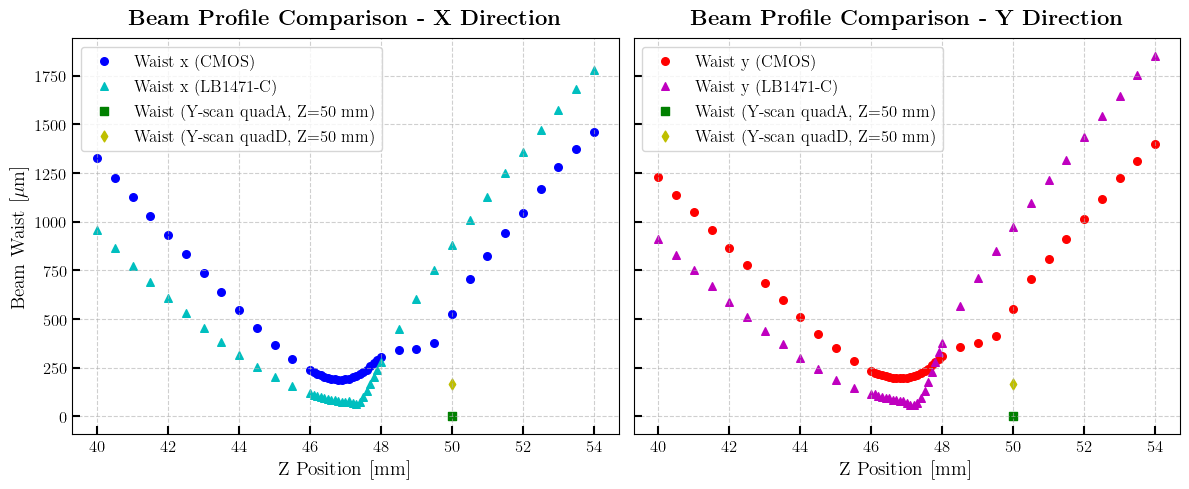

In [17]:
import os
import glob
import pickle
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.optimize import curve_fit
from scipy.special import erf

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Error function for curve fitting
def erf_model(x, A, B, C, D):
    return A * erf(B * (x - C)) + D

# Data paths
data_path_cmos = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_CMOS"
data_path_lb1471 = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_LB1471-C"
data_path_y_scan = "/Users/asca/Documents/University/Master Thesis/code/Data/manual setup/20250924/quadA&D/VIGO17_333-1_QPD_0750_20_AW_011_CC_250924_LB1471C_quadA&D_manual_setup_Z50mm_Yscan_gap_identification_precise"
fig_dir = os.path.join(data_path_cmos, "fig_comparison")
os.makedirs(fig_dir, exist_ok=True)

# CMOS data
file_list_cmos = sorted([f for f in glob.glob(os.path.join(data_path_cmos, "*mm Beam Results.csv")) 
                         if "before lens" not in os.path.basename(f).lower()])
z_values_cmos = []
width_x_cmos = []
width_y_cmos = []

# Extract CMOS data
for file in file_list_cmos:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    z_values_cmos.append(z)

    with open(file, 'r') as f:
        lines = f.readlines()

    for line in lines:
        if "Width x" in line:
            width_x_cmos.append(float(line.split()[2])/2)  # mm, radius
        if "Width y" in line:
            width_y_cmos.append(float(line.split()[2])/2)  # mm, radius

# Convert CMOS data to numpy arrays and sort
z_values_cmos = np.array(z_values_cmos)
width_x_cmos = np.array(width_x_cmos)
width_y_cmos = np.array(width_y_cmos)
sorted_indices_cmos = np.argsort(z_values_cmos)
z_values_cmos = z_values_cmos[sorted_indices_cmos]
width_x_cmos = width_x_cmos[sorted_indices_cmos]
width_y_cmos = width_y_cmos[sorted_indices_cmos]

# LB1471-C data
file_list_lb1471 = sorted([f for f in glob.glob(os.path.join(data_path_lb1471, "*mm_#001.txt")) 
                           if "before lens" not in os.path.basename(f).lower()],
                          key=lambda f: float(os.path.basename(f).split('mm')[0]))
z_values_lb1471 = []
width_x_lb1471 = []
width_y_lb1471 = []

# Extract LB1471-C data
for file in file_list_lb1471:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)

    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue

    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break

    if clip_width_x is not None and clip_width_y is not None:
        width_x_lb1471.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y_lb1471.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values_lb1471.append(z)
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

# Convert LB1471-C data to numpy arrays and sort
z_values_lb1471 = np.array(z_values_lb1471)
width_x_lb1471 = np.array(width_x_lb1471)
width_y_lb1471 = np.array(width_y_lb1471)
sorted_indices_lb1471 = np.argsort(z_values_lb1471)
z_values_lb1471 = z_values_lb1471[sorted_indices_lb1471]
width_x_lb1471 = width_x_lb1471[sorted_indices_lb1471]
width_y_lb1471 = width_y_lb1471[sorted_indices_lb1471]

# Y-scan quadA&D data (Z=50 mm)
y_folders = glob.glob(os.path.join(data_path_y_scan, "Y*um"))
y_positions = []
for folder in y_folders:
    match = re.search(r'Y(\d+)um', os.path.basename(folder))
    if match:
        y_positions.append((int(match.group(1)), folder))
y_positions.sort()

z_values_y_scan_a = []
z_values_y_scan_d = []
beam_waist_y_scan_a = []
beam_waist_y_scan_d = []

# Extract Y-scan quadA and quadD beam waists
for y_um, y_folder in y_positions:
    pkl_files = glob.glob(os.path.join(y_folder, "*.pkl"))
    if not pkl_files:
        print(f"No .pkl files found in {y_folder}")
        continue
    pkl_file = pkl_files[0]  # Take the first file

    data = load_data(pkl_file)
    xstart = data['global_params']['xstart_mm']
    xstop = data['global_params']['xstop_mm']
    xstep = data['global_params']['xstep_mm']
    steps = int((xstop - xstart) / xstep) + 1
    x_array = np.linspace(xstart, xstop, steps)

    z_mm = 50.0  # Fixed Z=50 mm
    for segn in ['quadA', 'quadD']:
        if segn in data['rawdata'] and 'dmm00_curr_amp' in data['rawdata'][segn]:
            dc_curr_avg = data['rawdata'][segn]['dmm00_curr_amp'].mean(axis=1)
            if len(x_array) != len(dc_curr_avg):
                print(f"Error: x_array and dc_curr_avg length mismatch for {pkl_file}, segment {segn}.")
                continue
            initial_guess_dc = [np.max(dc_curr_avg) / 2, 1.0, np.mean(x_array), np.min(dc_curr_avg)]
            try:
                params_dc, _ = curve_fit(erf_model, x_array, dc_curr_avg, p0=initial_guess_dc)
                A_fit_dc, B_fit_dc, x0_fit_dc, C_fit_dc = params_dc
                spot_size_dc = 1 / (np.sqrt(2) * B_fit_dc) * 1000  # Convert mm to µm
                if segn == 'quadA':
                    z_values_y_scan_a.append(z_mm)
                    beam_waist_y_scan_a.append(spot_size_dc)
                else:  # quadD
                    z_values_y_scan_d.append(z_mm)
                    beam_waist_y_scan_d.append(spot_size_dc)
                print(f"Y-scan {segn} - Z position: {z_mm:.1f} mm, Y position: {y_um} µm, Beam waist (DC): {spot_size_dc:.2f} µm")
            except RuntimeError:
                print(f"DC Fit failed for {pkl_file}, segment {segn}. Skipping.")
                continue
        else:
            print(f"Warning: No data for {segn} in {pkl_file}")

# Average beam waists across Y-positions for quadA and quadD
if beam_waist_y_scan_a:
    avg_beam_waist_a = np.mean(beam_waist_y_scan_a)
    z_values_y_scan_a = [50.0]  # Single point at Z=50 mm
    beam_waist_y_scan_a = [avg_beam_waist_a]
else:
    z_values_y_scan_a = []
    beam_waist_y_scan_a = []
if beam_waist_y_scan_d:
    avg_beam_waist_d = np.mean(beam_waist_y_scan_d)
    z_values_y_scan_d = [50.0]  # Single point at Z=50 mm
    beam_waist_y_scan_d = [avg_beam_waist_d]
else:
    z_values_y_scan_d = []
    beam_waist_y_scan_d = []

# Convert Y-scan data to numpy arrays
z_values_y_scan_a = np.array(z_values_y_scan_a)
beam_waist_y_scan_a = np.array(beam_waist_y_scan_a)
z_values_y_scan_d = np.array(z_values_y_scan_d)
beam_waist_y_scan_d = np.array(beam_waist_y_scan_d)

# Print data
print("CMOS Data:")
print(f"Processed {len(z_values_cmos)} valid data points out of {len(file_list_cmos)} files.")
for z, wx, wy in zip(z_values_cmos, width_x_cmos, width_y_cmos):
    print(f"z = {z:.1f} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nLB1471-C Data:")
print(f"Processed {len(z_values_lb1471)} valid data points out of {len(file_list_lb1471)} files.")
for z, wx, wy in zip(z_values_lb1471, width_x_lb1471, width_y_lb1471):
    print(f"z = {z:.1f} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nY-scan quadA Data (Z=50 mm):")
print(f"Processed {len(z_values_y_scan_a)} valid data points.")
for z, w in zip(z_values_y_scan_a, beam_waist_y_scan_a):
    print(f"z = {z:.1f} mm, Beam waist (DC): {w:.2f} µm")

print("\nY-scan quadD Data (Z=50 mm):")
print(f"Processed {len(z_values_y_scan_d)} valid data points.")
for z, w in zip(z_values_y_scan_d, beam_waist_y_scan_d):
    print(f"z = {z:.1f} mm, Beam waist (DC): {w:.2f} µm")

# Min waist values
min_waist_exp_x_cmos = min(width_x_cmos) * 1000 if width_x_cmos.size > 0 else float('inf')
min_waist_exp_y_cmos = min(width_y_cmos) * 1000 if width_y_cmos.size > 0 else float('inf')
min_waist_exp_x_lb1471 = min(width_x_lb1471) * 1000 if width_x_lb1471.size > 0 else float('inf')
min_waist_exp_y_lb1471 = min(width_y_lb1471) * 1000 if width_y_lb1471.size > 0 else float('inf')
min_waist_y_scan_a = min(beam_waist_y_scan_a) if beam_waist_y_scan_a.size > 0 else float('inf')
min_waist_y_scan_d = min(beam_waist_y_scan_d) if beam_waist_y_scan_d.size > 0 else float('inf')

print("\nBEAM WAIST SUMMARY")
print("CMOS Experimental:")
print(f"  Min Waist X: {min_waist_exp_x_cmos:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y_cmos:.2f} μm")
print("LB1471-C Experimental:")
print(f"  Min Waist X (Clip): {min_waist_exp_x_lb1471:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y_lb1471:.2f} μm")
print("Y-scan quadA Experimental (Z=50 mm):")
print(f"  Avg Waist: {min_waist_y_scan_a:.2f} μm")
print("Y-scan quadD Experimental (Z=50 mm):")
print(f"  Avg Waist: {min_waist_y_scan_d:.2f} μm")

# Create comparison plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Width x comparison
ax1.scatter(z_values_cmos, width_x_cmos * 1000, color='b', label='Waist x (CMOS)', marker='o', s=30)
ax1.scatter(z_values_lb1471, width_x_lb1471 * 1000, color='c', label='Waist x (LB1471-C)', marker='^', s=30)
ax1.scatter(z_values_y_scan_a, beam_waist_y_scan_a, color='g', label='Waist (Y-scan quadA, Z=50 mm)', marker='s', s=30)
ax1.scatter(z_values_y_scan_d, beam_waist_y_scan_d, color='y', label='Waist (Y-scan quadD, Z=50 mm)', marker='d', s=30)
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Waist [$\mu$m]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile Comparison - X Direction}', fontsize=16, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=12, frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot Width y comparison
ax2.scatter(z_values_cmos, width_y_cmos * 1000, color='r', label='Waist y (CMOS)', marker='o', s=30)
ax2.scatter(z_values_lb1471, width_y_lb1471 * 1000, color='m', label='Waist y (LB1471-C)', marker='^', s=30)
ax2.scatter(z_values_y_scan_a, beam_waist_y_scan_a, color='g', label='Waist (Y-scan quadA, Z=50 mm)', marker='s', s=30)
ax2.scatter(z_values_y_scan_d, beam_waist_y_scan_d, color='y', label='Waist (Y-scan quadD, Z=50 mm)', marker='d', s=30)
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile Comparison - Y Direction}', fontsize=16, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=12, frameon=True)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_comparison_with_y_scan.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()

Selected Y position with max current: 2300um
Calculated beam waist from QPD at Z=50mm: 0.322 mm (321.62 μm)
CMOS Data:
Processed 45 valid data points out of 45 files.
z = 40.0 mm, Width_x = 1.327 mm, Width_y = 1.230 mm
z = 40.5 mm, Width_x = 1.226 mm, Width_y = 1.139 mm
z = 41.0 mm, Width_x = 1.127 mm, Width_y = 1.048 mm
z = 41.5 mm, Width_x = 1.028 mm, Width_y = 0.959 mm
z = 42.0 mm, Width_x = 0.931 mm, Width_y = 0.866 mm
z = 42.5 mm, Width_x = 0.832 mm, Width_y = 0.776 mm
z = 43.0 mm, Width_x = 0.735 mm, Width_y = 0.687 mm
z = 43.5 mm, Width_x = 0.639 mm, Width_y = 0.598 mm
z = 44.0 mm, Width_x = 0.545 mm, Width_y = 0.512 mm
z = 44.5 mm, Width_x = 0.453 mm, Width_y = 0.425 mm
z = 45.0 mm, Width_x = 0.368 mm, Width_y = 0.350 mm
z = 45.5 mm, Width_x = 0.295 mm, Width_y = 0.285 mm
z = 46.0 mm, Width_x = 0.236 mm, Width_y = 0.232 mm
z = 46.1 mm, Width_x = 0.227 mm, Width_y = 0.224 mm
z = 46.2 mm, Width_x = 0.219 mm, Width_y = 0.217 mm
z = 46.3 mm, Width_x = 0.211 mm, Width_y = 0.210 mm
z

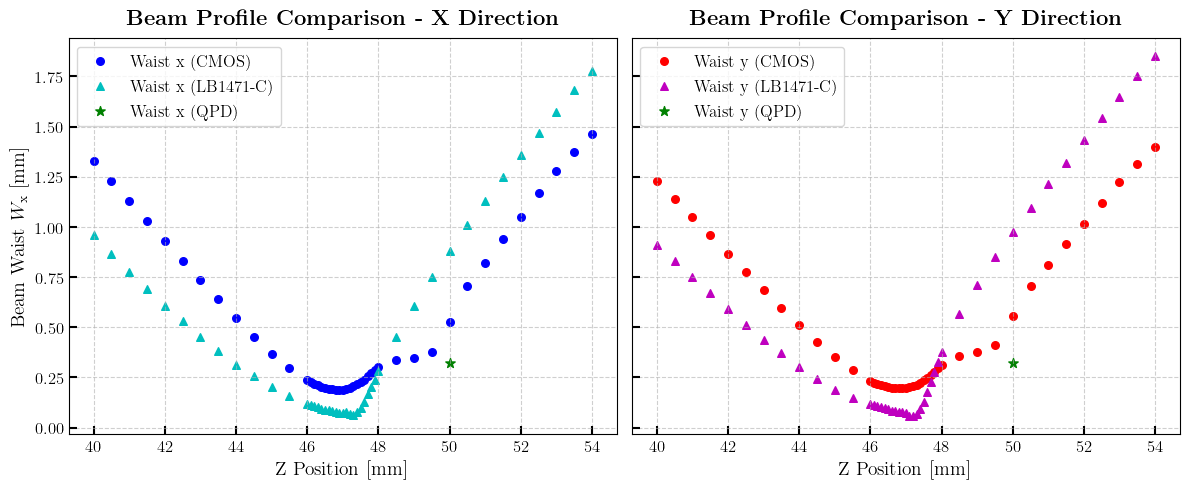

In [25]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pickle
import re
from scipy.special import erf
from scipy.optimize import curve_fit

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data paths for first script
data_path_cmos = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_CMOS"
data_path_lb1471 = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_LB1471-C"
fig_dir = os.path.join(data_path_cmos, "fig_comparison")
os.makedirs(fig_dir, exist_ok=True)

# Data path for second script
base_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/manual setup/20250924/quadA&D/VIGO17_333-1_QPD_0750_20_AW_011_CC_250924_LB1471C_quadA&D_manual_setup_Z50mm_Yscan_gap_identification_precise"

# --- First Script Data Extraction ---
# CMOS data
file_list_cmos = sorted([f for f in glob.glob(os.path.join(data_path_cmos, "*mm Beam Results.csv")) 
                         if "before lens" not in os.path.basename(f).lower()])
z_values_cmos = []
width_x_cmos = []
width_y_cmos = []

for file in file_list_cmos:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    z_values_cmos.append(z)
    with open(file, 'r') as f:
        lines = f.readlines()
    for line in lines:
        if "Width x" in line:
            width_x_cmos.append(float(line.split()[2])/2)
        if "Width y" in line:
            width_y_cmos.append(float(line.split()[2])/2)

z_values_cmos = np.array(z_values_cmos)
width_x_cmos = np.array(width_x_cmos)
width_y_cmos = np.array(width_y_cmos)
sorted_indices_cmos = np.argsort(z_values_cmos)
z_values_cmos = z_values_cmos[sorted_indices_cmos]
width_x_cmos = width_x_cmos[sorted_indices_cmos]
width_y_cmos = width_y_cmos[sorted_indices_cmos]

# LB1471-C data
file_list_lb1471 = sorted([f for f in glob.glob(os.path.join(data_path_lb1471, "*mm_#001.txt")) 
                           if "before lens" not in os.path.basename(f).lower()],
                          key=lambda f: float(os.path.basename(f).split('mm')[0]))
z_values_lb1471 = []
width_x_lb1471 = []
width_y_lb1471 = []

for file in file_list_lb1471:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue
    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break
    if clip_width_x is not None and clip_width_y is not None:
        width_x_lb1471.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y_lb1471.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values_lb1471.append(z)
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

z_values_lb1471 = np.array(z_values_lb1471)
width_x_lb1471 = np.array(width_x_lb1471)
width_y_lb1471 = np.array(width_y_lb1471)
sorted_indices_lb1471 = np.argsort(z_values_lb1471)
z_values_lb1471 = z_values_lb1471[sorted_indices_lb1471]
width_x_lb1471 = width_x_lb1471[sorted_indices_lb1471]
width_y_lb1471 = width_y_lb1471[sorted_indices_lb1471]

# --- Second Script Data Extraction for Beam Waist Calculation ---
def load_data(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

def extract_y_position(folder_name):
    match = re.search(r'Y(\d+)um', folder_name)
    if match:
        return int(match.group(1))
    return None

def knife_edge(x, a, b, c, d):
    return a * (erf(b * (x - c)) + 1) + d

# Find all Y-position folders
y_folders = glob.glob(os.path.join(base_dir, "Y*um"))
y_positions = []
for folder in y_folders:
    y_um = extract_y_position(os.path.basename(folder))
    if y_um is not None:
        y_positions.append((y_um, folder))
y_positions.sort()

# Find the Y position with maximum photocurrent
max_current = 0
selected_y_um = None
selected_x_array = None
selected_quadA_mean = None
selected_quadD_mean = None

for y_um, y_folder in y_positions:
    pkl_files = glob.glob(os.path.join(y_folder, "*.pkl"))
    if not pkl_files:
        continue
    pkl_file = pkl_files[0]
    data = load_data(pkl_file)
    xstart = data['global_params']['xstart_mm']
    xstop = data['global_params']['xstop_mm']
    xstep = data['global_params']['xstep_mm']
    steps = int((xstop - xstart) / xstep) + 1
    x_array = np.linspace(xstart, xstop, steps)
    quadA_mean = data['rawdata']['quadA']['dmm00_curr_amp'].mean(axis=1) if 'quadA' in data['rawdata'] else np.zeros_like(x_array)
    quadD_mean = data['rawdata']['quadD']['dmm00_curr_amp'].mean(axis=1) if 'quadD' in data['rawdata'] else np.zeros_like(x_array)
    current_sum = np.max(quadA_mean) + np.max(quadD_mean)
    if current_sum > max_current:
        max_current = current_sum
        selected_y_um = y_um
        selected_x_array = x_array
        selected_quadA_mean = quadA_mean
        selected_quadD_mean = quadD_mean

if selected_y_um is None:
    print("No valid data found for QPD beam waist calculation.")
    w_qpd = None
else:
    print(f"Selected Y position with max current: {selected_y_um}um")
    # Fit for quadA
    try:
        p0_a = [(np.max(selected_quadA_mean) - np.min(selected_quadA_mean))/2, 1.0, np.mean(selected_x_array), np.min(selected_quadA_mean)]
        popt_a, _ = curve_fit(knife_edge, selected_x_array, selected_quadA_mean, p0=p0_a, maxfev=10000)
        w_a = np.sqrt(2) / np.abs(popt_a[1])
    except Exception as e:
        print(f"Fit failed for quadA: {e}")
        w_a = None

    # Fit for quadD
    try:
        p0_d = [(np.max(selected_quadD_mean) - np.min(selected_quadD_mean))/2, 1.0, np.mean(selected_x_array), np.min(selected_quadD_mean)]
        popt_d, _ = curve_fit(knife_edge, selected_x_array, selected_quadD_mean, p0=p0_d, maxfev=10000)
        w_d = np.sqrt(2) / np.abs(popt_d[1])
    except Exception as e:
        print(f"Fit failed for quadD: {e}")
        w_d = None

    # Average if both successful, else use the successful one
    if w_a is not None and w_d is not None:
        w_qpd = (w_a + w_d) / 2
    elif w_a is not None:
        w_qpd = w_a
    elif w_d is not None:
        w_qpd = w_d
    else:
        w_qpd = None

    if w_qpd is not None:
        print(f"Calculated beam waist from QPD at Z=50mm: {w_qpd:.3f} mm ({w_qpd*1000:.2f} μm)")

# --- Print Data Summary ---
print("CMOS Data:")
print(f"Processed {len(z_values_cmos)} valid data points out of {len(file_list_cmos)} files.")
for z, wx, wy in zip(z_values_cmos, width_x_cmos, width_y_cmos):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nLB1471-C Data:")
print(f"Processed {len(z_values_lb1471)} valid data points out of {len(file_list_lb1471)} files.")
for z, wx, wy in zip(z_values_lb1471, width_x_lb1471, width_y_lb1471):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

min_waist_exp_x_cmos = min(width_x_cmos) * 1000
min_waist_exp_y_cmos = min(width_y_cmos) * 1000
min_waist_exp_x_lb1471 = min(width_x_lb1471) * 1000
min_waist_exp_y_lb1471 = min(width_y_lb1471) * 1000

print("\nBEAM WAIST SUMMARY")
print("CMOS Experimental:")
print(f"  Min Waist X: {min_waist_exp_x_cmos:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y_cmos:.2f} μm")
print("LB1471-C Experimental:")
print(f"  Min Waist X (Clip): {min_waist_exp_x_lb1471:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y_lb1471:.2f} μm")
if w_qpd is not None:
    print("QPD at Z=50mm:")
    print(f"  Waist (same for X and Y): {w_qpd*1000:.2f} μm")

# --- Create Comparison Plots with QPD Waist ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Width x comparison
ax1.scatter(z_values_cmos, width_x_cmos, color='b', label='Waist x (CMOS)', marker='o', s=30)
ax1.scatter(z_values_lb1471, width_x_lb1471, color='c', label='Waist x (LB1471-C)', marker='^', s=30)
if w_qpd is not None:
    ax1.scatter(50, w_qpd, color='g', label='Waist x (QPD)', marker='*', s=50)
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile Comparison - X Direction}', fontsize=16, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=12, frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot Width y comparison
ax2.scatter(z_values_cmos, width_y_cmos, color='r', label='Waist y (CMOS)', marker='o', s=30)
ax2.scatter(z_values_lb1471, width_y_lb1471, color='m', label='Waist y (LB1471-C)', marker='^', s=30)
if w_qpd is not None:
    ax2.scatter(50, w_qpd, color='g', label='Waist y (QPD)', marker='*', s=50)
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile Comparison - Y Direction}', fontsize=16, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=12, frameon=True)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_comparison_with_qpd.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()

In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pickle
import re

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Data paths for first script
data_path_cmos = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_CMOS"
data_path_lb1471 = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_LB1471-C"
fig_dir = os.path.join(data_path_cmos, "fig_comparison")
os.makedirs(fig_dir, exist_ok=True)

# Data path for second script
base_dir = "/Users/asca/Documents/University/Master Thesis/code/Data/manual setup/20250924/quadA&D/VIGO17_333-1_QPD_0750_20_AW_011_CC_250924_LB1471C_quadA&D_manual_setup_Z50mm_Yscan_gap_identification_precise"

# --- First Script Data Extraction ---
# CMOS data
file_list_cmos = sorted([f for f in glob.glob(os.path.join(data_path_cmos, "*mm Beam Results.csv")) 
                         if "before lens" not in os.path.basename(f).lower()])
z_values_cmos = []
width_x_cmos = []
width_y_cmos = []

for file in file_list_cmos:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    z_values_cmos.append(z)
    with open(file, 'r') as f:
        lines = f.readlines()
    for line in lines:
        if "Width x" in line:
            width_x_cmos.append(float(line.split()[2])/2)
        if "Width y" in line:
            width_y_cmos.append(float(line.split()[2])/2)

z_values_cmos = np.array(z_values_cmos)
width_x_cmos = np.array(width_x_cmos)
width_y_cmos = np.array(width_y_cmos)
sorted_indices_cmos = np.argsort(z_values_cmos)
z_values_cmos = z_values_cmos[sorted_indices_cmos]
width_x_cmos = width_x_cmos[sorted_indices_cmos]
width_y_cmos = width_y_cmos[sorted_indices_cmos]

# LB1471-C data
file_list_lb1471 = sorted([f for f in glob.glob(os.path.join(data_path_lb1471, "*mm_#001.txt")) 
                           if "before lens" not in os.path.basename(f).lower()],
                          key=lambda f: float(os.path.basename(f).split('mm')[0]))
z_values_lb1471 = []
width_x_lb1471 = []
width_y_lb1471 = []

for file in file_list_lb1471:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue
    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break
    if clip_width_x is not None and clip_width_y is not None:
        width_x_lb1471.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y_lb1471.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values_lb1471.append(z)
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

z_values_lb1471 = np.array(z_values_lb1471)
width_x_lb1471 = np.array(width_x_lb1471)
width_y_lb1471 = np.array(width_y_lb1471)
sorted_indices_lb1471 = np.argsort(z_values_lb1471)
z_values_lb1471 = z_values_lb1471[sorted_indices_lb1471]
width_x_lb1471 = width_x_lb1471[sorted_indices_lb1471]
width_y_lb1471 = width_y_lb1471[sorted_indices_lb1471]

# --- Second Script Data Extraction ---
def load_data(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

def extract_y_position(folder_name):
    match = re.search(r'Y(\d+)um', folder_name)
    if match:
        return int(match.group(1))
    return None

# Find all Y-position folders
y_folders = glob.glob(os.path.join(base_dir, "Y*um"))
y_positions = []
for folder in y_folders:
    y_um = extract_y_position(os.path.basename(folder))
    if y_um is not None:
        y_positions.append((y_um, folder))
y_positions.sort()

# Collect photocurrent data for all Y positions
photocurrent_data = []
for y_um, y_folder in y_positions:
    pkl_files = glob.glob(os.path.join(y_folder, "*.pkl"))
    if not pkl_files:
        print(f"No .pkl files found in {y_folder}")
        continue
    pkl_file = pkl_files[0]
    data = load_data(pkl_file)
    xstart = data['global_params']['xstart_mm']
    xstop = data['global_params']['xstop_mm']
    xstep = data['global_params']['xstep_mm']
    steps = int((xstop - xstart) / xstep) + 1
    x_array = np.linspace(xstart, xstop, steps)
    quadA_mean = data['rawdata']['quadA']['dmm00_curr_amp'].mean(axis=1) if 'quadA' in data['rawdata'] else None
    quadD_mean = data['rawdata']['quadD']['dmm00_curr_amp'].mean(axis=1) if 'quadD' in data['rawdata'] else None
    if quadA_mean is not None and quadD_mean is not None:
        photocurrent_data.append({
            'y_um': y_um,
            'x_array': x_array,
            'quadA_mean': quadA_mean,
            'quadD_mean': quadD_mean
        })
    else:
        print(f"Missing quadA or quadD data in {pkl_file}")

print(f"Processed {len(photocurrent_data)} Y positions for photocurrent data.")

# --- Print Data Summary ---
print("CMOS Data:")
print(f"Processed {len(z_values_cmos)} valid data points out of {len(file_list_cmos)} files.")
for z, wx, wy in zip(z_values_cmos, width_x_cmos, width_y_cmos):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nLB1471-C Data:")
print(f"Processed {len(z_values_lb1471)} valid data points out of {len(file_list_lb1471)} files.")
for z, wx, wy in zip(z_values_lb1471, width_x_lb1471, width_y_lb1471):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nBEAM WAIST SUMMARY")
print("CMOS Experimental:")
print(f"  Min Waist X: {min(width_x_cmos) * 1000:.2f} μm")
print(f"  Min Waist Y: {min(width_y_cmos) * 1000:.2f} μm")
print("LB1471-C Experimental:")
print(f"  Min Waist X (Clip): {min(width_x_lb1471) * 1000:.2f} μm")
print(f"  Min Waist Y (Clip): {min(width_y_lb1471) * 1000:.2f} μm")

# --- Create Comparison Plots with Photocurrent ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Colors for different Y positions
colors = ['orange', 'green', 'purple', 'brown', 'pink', 'gray']  # Adjust if more than 6 Y positions

# Plot Width x comparison
ax1.scatter(z_values_cmos, width_x_cmos, color='b', label='Waist x (CMOS)', marker='o', s=30)
ax1.scatter(z_values_lb1471, width_x_lb1471, color='c', label='Waist x (LB1471-C)', marker='^', s=30)
ax1.set_xlabel(r'Position [mm]', fontsize=14)  # Changed to 'Position' to accommodate X and Z
ax1.set_ylabel(r'Beam Waist $W_{\rm{x}}$ [mm]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile Comparison - X Direction}', fontsize=16, fontweight='bold', pad=10)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)

# Add photocurrent data (Quad A) on secondary axis
ax1_sec = ax1.twinx()
for i, data in enumerate(photocurrent_data):
    if i < len(colors):  # Ensure we don't run out of colors
        ax1_sec.plot(data['x_array'], data['quadA_mean'], color=colors[i], 
                     label=f'Photocurrent QuadA (Y={data["y_um"]}μm)', linestyle='--')
ax1_sec.set_ylabel(r'Photocurrent [A]', fontsize=14, color='orange')
ax1_sec.tick_params(axis='y', labelcolor='orange')
ax1.legend(loc='upper left', fontsize=10, frameon=True)
ax1_sec.legend(loc='upper right', fontsize=10, frameon=True)

# Plot Width y comparison
ax2.scatter(z_values_cmos, width_y_cmos, color='r', label='Waist y (CMOS)', marker='o', s=30)
ax2.scatter(z_values_lb1471, width_y_lb1471, color='m', label='Waist y (LB1471-C)', marker='^', s=30)
ax2.set_xlabel(r'Position [mm]', fontsize=14)  # Changed to 'Position' to accommodate X and Z
ax2.set_title(r'\textbf{Beam Profile Comparison - Y Direction}', fontsize=16, fontweight='bold', pad=10)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)

# Add photocurrent data (Quad D) on secondary axis
ax2_sec = ax2.twinx()
for i, data in enumerate(photocurrent_data):
    if i < len(colors):  # Ensure we don't run out of colors
        ax2_sec.plot(data['x_array'], data['quadD_mean'], color=colors[i], 
                     label=f'Photocurrent QuadD (Y={data["y_um"]}μm)', linestyle='--')
ax2_sec.set_ylabel(r'Photocurrent [A]', fontsize=14, color='orange')
ax2_sec.tick_params(axis='y', labelcolor='orange')
ax2.legend(loc='upper left', fontsize=10, frameon=True)
ax2_sec.legend(loc='upper right', fontsize=10, frameon=True)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_comparison_with_photocurrent.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()

Processed 37 Y positions for photocurrent data.
CMOS Data:
Processed 45 valid data points out of 45 files.
z = 40.0 mm, Width_x = 1.327 mm, Width_y = 1.230 mm
z = 40.5 mm, Width_x = 1.226 mm, Width_y = 1.139 mm
z = 41.0 mm, Width_x = 1.127 mm, Width_y = 1.048 mm
z = 41.5 mm, Width_x = 1.028 mm, Width_y = 0.959 mm
z = 42.0 mm, Width_x = 0.931 mm, Width_y = 0.866 mm
z = 42.5 mm, Width_x = 0.832 mm, Width_y = 0.776 mm
z = 43.0 mm, Width_x = 0.735 mm, Width_y = 0.687 mm
z = 43.5 mm, Width_x = 0.639 mm, Width_y = 0.598 mm
z = 44.0 mm, Width_x = 0.545 mm, Width_y = 0.512 mm
z = 44.5 mm, Width_x = 0.453 mm, Width_y = 0.425 mm
z = 45.0 mm, Width_x = 0.368 mm, Width_y = 0.350 mm
z = 45.5 mm, Width_x = 0.295 mm, Width_y = 0.285 mm
z = 46.0 mm, Width_x = 0.236 mm, Width_y = 0.232 mm
z = 46.1 mm, Width_x = 0.227 mm, Width_y = 0.224 mm
z = 46.2 mm, Width_x = 0.219 mm, Width_y = 0.217 mm
z = 46.3 mm, Width_x = 0.211 mm, Width_y = 0.210 mm
z = 46.4 mm, Width_x = 0.204 mm, Width_y = 0.205 mm
z = 46.5 

RuntimeError: latex was not able to process the following string:
b'Photocurrent QuadA (Y=1950\\u03bcm)'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpemtyryye b629adc273cd9194e7e31601e2236b08.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./b629adc273cd9194e7e31601e2236b08.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-02-20>
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2024/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2024/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file b629adc273cd9194e7e31601e2236b08.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.30 {\rmfamily Photocurrent QuadA (Y=1950μ
                                            m)}%
No pages of output.
Transcript written on tmpemtyryye/b629adc273cd9194e7e31601e2236b08.log.




Error in callback <function _draw_all_if_interactive at 0x1191740d0> (for post_execute), with arguments args (),kwargs {}:


RuntimeError: latex was not able to process the following string:
b'Photocurrent QuadA (Y=1950\\u03bcm)'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmpx39mn0ju b629adc273cd9194e7e31601e2236b08.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./b629adc273cd9194e7e31601e2236b08.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-02-20>
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2024/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2024/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file b629adc273cd9194e7e31601e2236b08.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.30 {\rmfamily Photocurrent QuadA (Y=1950μ
                                            m)}%
No pages of output.
Transcript written on tmpx39mn0ju/b629adc273cd9194e7e31601e2236b08.log.




RuntimeError: latex was not able to process the following string:
b'Photocurrent QuadA (Y=1950\\u03bcm)'

Here is the full command invocation and its output:

latex -interaction=nonstopmode --halt-on-error --output-directory=tmp5h65jr8t b629adc273cd9194e7e31601e2236b08.tex

This is pdfTeX, Version 3.141592653-2.6-1.40.26 (TeX Live 2024) (preloaded format=latex)
 restricted \write18 enabled.
entering extended mode
(./b629adc273cd9194e7e31601e2236b08.tex
LaTeX2e <2023-11-01> patch level 1
L3 programming layer <2024-02-20>
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/article.cls
Document Class: article 2023/05/17 v1.4n Standard LaTeX document class
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/size10.clo))
(/usr/local/texlive/2024/texmf-dist/tex/latex/type1cm/type1cm.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/cm-super/type1ec.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/t1cmr.fd))
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/inputenc.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/geometry/geometry.sty
(/usr/local/texlive/2024/texmf-dist/tex/latex/graphics/keyval.sty)
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/ifvtex.sty
(/usr/local/texlive/2024/texmf-dist/tex/generic/iftex/iftex.sty)))
(/usr/local/texlive/2024/texmf-dist/tex/latex/underscore/underscore.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/firstaid/underscore-ltx.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/base/textcomp.sty)
(/usr/local/texlive/2024/texmf-dist/tex/latex/l3backend/l3backend-dvips.def)
No file b629adc273cd9194e7e31601e2236b08.aux.
*geometry* driver: auto-detecting
*geometry* detected driver: dvips

! LaTeX Error: Unicode character μ (U+03BC)
               not set up for use with LaTeX.

See the LaTeX manual or LaTeX Companion for explanation.
Type  H <return>  for immediate help.
 ...                                              
                                                  
l.30 {\rmfamily Photocurrent QuadA (Y=1950μ
                                            m)}%
No pages of output.
Transcript written on tmp5h65jr8t/b629adc273cd9194e7e31601e2236b08.log.




<Figure size 1200x500 with 4 Axes>

QPD quadA - Y=1950μm, Z=50.0 mm, Beam waist: 213.53 µm
QPD quadD - Y=1950μm, Z=50.0 mm, Beam waist: 63.10 µm
QPD quadA - Y=2000μm, Z=50.0 mm, Beam waist: 224.96 µm
QPD quadD - Y=2000μm, Z=50.0 mm, Beam waist: 72.72 µm
QPD quadA - Y=2050μm, Z=50.0 mm, Beam waist: 225.10 µm
QPD quadD - Y=2050μm, Z=50.0 mm, Beam waist: 86.00 µm
QPD quadA - Y=2100μm, Z=50.0 mm, Beam waist: 218.61 µm
QPD quadD - Y=2100μm, Z=50.0 mm, Beam waist: 99.26 µm
QPD quadA - Y=2150μm, Z=50.0 mm, Beam waist: 208.31 µm
QPD quadD - Y=2150μm, Z=50.0 mm, Beam waist: 164.23 µm
QPD quadA - Y=2200μm, Z=50.0 mm, Beam waist: 198.62 µm
QPD quadD - Y=2200μm, Z=50.0 mm, Beam waist: 178.52 µm
QPD quadA - Y=2250μm, Z=50.0 mm, Beam waist: 186.37 µm
QPD quadD - Y=2250μm, Z=50.0 mm, Beam waist: 190.14 µm
QPD quadA - Y=2300μm, Z=50.0 mm, Beam waist: 174.34 µm
QPD quadD - Y=2300μm, Z=50.0 mm, Beam waist: 198.13 µm
QPD quadA - Y=2350μm, Z=50.0 mm, Beam waist: 163.61 µm
QPD quadD - Y=2350μm, Z=50.0 mm, Beam waist: 1.76 µm
QPD quadA - Y=24

/Users/asca/miniconda/envs/ascanio_root/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


QPD quadD - Y=3650μm, Z=50.0 mm, Beam waist: 257.13 µm
QPD quadA - Y=3700μm, Z=50.0 mm, Beam waist: 230.10 µm
QPD quadD - Y=3700μm, Z=50.0 mm, Beam waist: 247.60 µm
QPD quadA - Y=3750μm, Z=50.0 mm, Beam waist: 271.93 µm
QPD quadD - Y=3750μm, Z=50.0 mm, Beam waist: 241.69 µm
CMOS Data:
Processed 45 valid data points out of 45 files.
z = 40.0 mm, Width_x = 1.327 mm, Width_y = 1.230 mm
z = 40.5 mm, Width_x = 1.226 mm, Width_y = 1.139 mm
z = 41.0 mm, Width_x = 1.127 mm, Width_y = 1.048 mm
z = 41.5 mm, Width_x = 1.028 mm, Width_y = 0.959 mm
z = 42.0 mm, Width_x = 0.931 mm, Width_y = 0.866 mm
z = 42.5 mm, Width_x = 0.832 mm, Width_y = 0.776 mm
z = 43.0 mm, Width_x = 0.735 mm, Width_y = 0.687 mm
z = 43.5 mm, Width_x = 0.639 mm, Width_y = 0.598 mm
z = 44.0 mm, Width_x = 0.545 mm, Width_y = 0.512 mm
z = 44.5 mm, Width_x = 0.453 mm, Width_y = 0.425 mm
z = 45.0 mm, Width_x = 0.368 mm, Width_y = 0.350 mm
z = 45.5 mm, Width_x = 0.295 mm, Width_y = 0.285 mm
z = 46.0 mm, Width_x = 0.236 mm, Width_y =

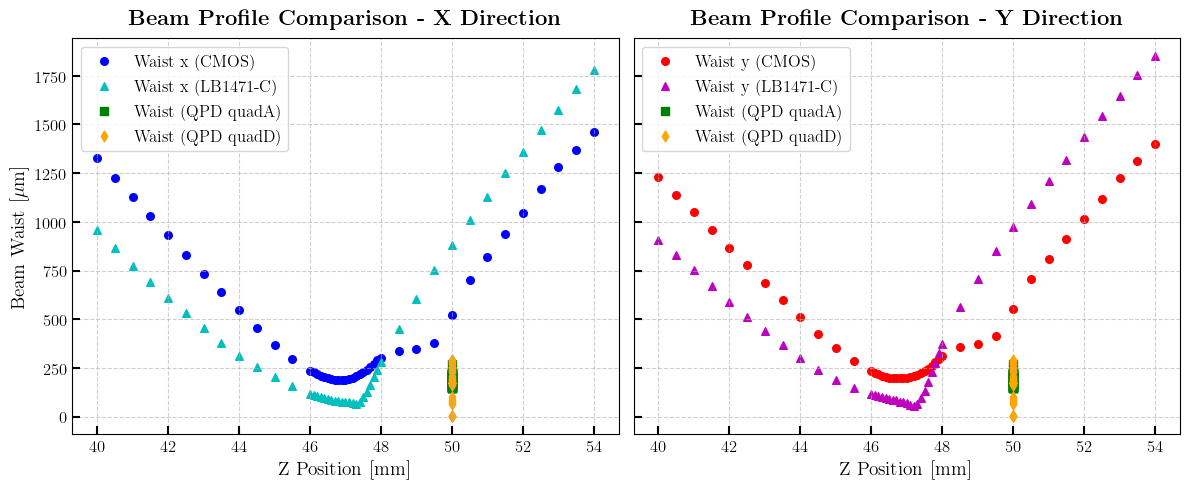

In [3]:
import os
import glob
import pickle
import re
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from scipy.optimize import curve_fit
from scipy.special import erf

# Set up font properties for CMU Serif
font_path = "/Users/asca/Library/Fonts/cmunrm.ttf"
cmu_serif = fm.FontProperties(fname=font_path)
plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Computer Modern']

# Error function for curve fitting
def erf_model(x, A, B, C, D):
    return A * erf(B * (x - C)) + D

# Data paths
data_path_cmos = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_CMOS"
data_path_lb1471 = "/Users/asca/Documents/University/Master Thesis/code/Data/slit scanning beam profiler/251015_old_telescoping_LB1471-C"
data_path_qpd = "/Users/asca/Documents/University/Master Thesis/code/Data/manual setup/20250924/quadA&D/VIGO17_333-1_QPD_0750_20_AW_011_CC_250924_LB1471C_quadA&D_manual_setup_Z50mm_Yscan_gap_identification_precise"
fig_dir = os.path.join(data_path_cmos, "fig_comparison")
os.makedirs(fig_dir, exist_ok=True)

# --- CMOS Data Extraction ---
file_list_cmos = sorted([f for f in glob.glob(os.path.join(data_path_cmos, "*mm Beam Results.csv")) 
                         if "before lens" not in os.path.basename(f).lower()])
z_values_cmos = []
width_x_cmos = []
width_y_cmos = []

for file in file_list_cmos:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    z_values_cmos.append(z)
    with open(file, 'r') as f:
        lines = f.readlines()
    for line in lines:
        if "Width x" in line:
            width_x_cmos.append(float(line.split()[2])/2)  # mm, radius
        if "Width y" in line:
            width_y_cmos.append(float(line.split()[2])/2)  # mm, radius

z_values_cmos = np.array(z_values_cmos)
width_x_cmos = np.array(width_x_cmos)
width_y_cmos = np.array(width_y_cmos)
sorted_indices_cmos = np.argsort(z_values_cmos)
z_values_cmos = z_values_cmos[sorted_indices_cmos]
width_x_cmos = width_x_cmos[sorted_indices_cmos]
width_y_cmos = width_y_cmos[sorted_indices_cmos]

# --- LB1471-C Data Extraction ---
file_list_lb1471 = sorted([f for f in glob.glob(os.path.join(data_path_lb1471, "*mm_#001.txt")) 
                           if "before lens" not in os.path.basename(f).lower()],
                          key=lambda f: float(os.path.basename(f).split('mm')[0]))
z_values_lb1471 = []
width_x_lb1471 = []
width_y_lb1471 = []

for file in file_list_lb1471:
    filename = os.path.basename(file)
    z_str = filename.split('mm')[0].strip()
    z = float(z_str)
    try:
        with open(file, 'r', encoding='latin1') as f:
            lines = f.readlines()
    except Exception as e:
        print(f"Error reading {file}: {e}. Skipping.")
        continue
    clip_width_x = None
    clip_width_y = None
    for line in lines:
        if line.strip() and line.split('\t')[0].isdigit():
            parts = line.strip().split('\t')
            try:
                if parts[15] != '--' and parts[16] != '--':
                    clip_width_x = float(parts[15])
                    clip_width_y = float(parts[16])
                else:
                    print(f"Missing data ('--') in {file} for Beam Width Clip values.")
                    break
            except (IndexError, ValueError) as e:
                print(f"Error parsing Beam Width Clip values in {file}: {e}.")
                continue
            break
    if clip_width_x is not None and clip_width_y is not None:
        width_x_lb1471.append(clip_width_x / 2 / 1000)  # Convert µm to mm, diameter to radius
        width_y_lb1471.append(clip_width_y / 2 / 1000)  # Convert µm to mm, diameter to radius
        z_values_lb1471.append(z)
    else:
        print(f"Skipping {file} due to missing or invalid Beam Width Clip data.")

z_values_lb1471 = np.array(z_values_lb1471)
width_x_lb1471 = np.array(width_x_lb1471)
width_y_lb1471 = np.array(width_y_lb1471)
sorted_indices_lb1471 = np.argsort(z_values_lb1471)
z_values_lb1471 = z_values_lb1471[sorted_indices_lb1471]
width_x_lb1471 = width_x_lb1471[sorted_indices_lb1471]
width_y_lb1471 = width_y_lb1471[sorted_indices_lb1471]

# --- QPD Data Extraction (Quadrant A and D) ---
def load_data(file_path):
    with open(file_path, "rb") as file:
        return pickle.load(file)

def extract_y_position(folder_name):
    match = re.search(r'Y(\d+)um', folder_name)
    if match:
        return int(match.group(1))
    return None

# Find all Y-position folders
y_folders = glob.glob(os.path.join(data_path_qpd, "Y*um"))
y_positions = []
for folder in y_folders:
    y_um = extract_y_position(os.path.basename(folder))
    if y_um is not None:
        y_positions.append((y_um, folder))
y_positions.sort()

# Extract QPD data for Quadrant A and D
z_values_qpd_a = []
beam_waist_qpd_a = []
z_values_qpd_d = []
beam_waist_qpd_d = []

for y_um, y_folder in y_positions:
    pkl_files = glob.glob(os.path.join(y_folder, "*.pkl"))
    if not pkl_files:
        print(f"No .pkl files found in {y_folder}")
        continue
    pkl_file = pkl_files[0]
    data = load_data(pkl_file)
    xstart = data['global_params']['xstart_mm']
    xstop = data['global_params']['xstop_mm']
    xstep = data['global_params']['xstep_mm']
    steps = int((xstop - xstart) / xstep) + 1
    x_array = np.linspace(xstart, xstop, steps) * 1000  # Convert mm to µm for fitting
    z_mm = 50.0  # Fixed Z position from second script

    # Quadrant A
    if 'quadA' in data['rawdata'] and 'dmm00_curr_amp' in data['rawdata']['quadA']:
        quadA_mean = data['rawdata']['quadA']['dmm00_curr_amp'].mean(axis=1)
        if len(x_array) != len(quadA_mean):
            print(f"Error: x_array and quadA_mean length mismatch for {pkl_file}.")
            continue
        initial_guess = [np.max(quadA_mean) / 2, 0.01, np.mean(x_array), np.min(quadA_mean)]
        try:
            params, _ = curve_fit(erf_model, x_array, quadA_mean, p0=initial_guess, maxfev=10000)
            A, B, C, D = params
            spot_size = 1 / (np.sqrt(2) * abs(B))  # Beam waist in µm
            z_values_qpd_a.append(z_mm)
            beam_waist_qpd_a.append(spot_size)
            print(f"QPD quadA - Y={y_um}μm, Z={z_mm:.1f} mm, Beam waist: {spot_size:.2f} µm")
        except RuntimeError as e:
            print(f"Fit failed for quadA in {pkl_file}: {e}. Skipping.")
            continue
    else:
        print(f"Warning: No quadA data in {pkl_file}")

    # Quadrant D
    if 'quadD' in data['rawdata'] and 'dmm00_curr_amp' in data['rawdata']['quadD']:
        quadD_mean = data['rawdata']['quadD']['dmm00_curr_amp'].mean(axis=1)
        if len(x_array) != len(quadD_mean):
            print(f"Error: x_array and quadD_mean length mismatch for {pkl_file}.")
            continue
        initial_guess = [np.max(quadD_mean) / 2, 0.01, np.mean(x_array), np.min(quadD_mean)]
        try:
            params, _ = curve_fit(erf_model, x_array, quadD_mean, p0=initial_guess, maxfev=10000)
            A, B, C, D = params
            spot_size = 1 / (np.sqrt(2) * abs(B))  # Beam waist in µm
            z_values_qpd_d.append(z_mm)
            beam_waist_qpd_d.append(spot_size)
            print(f"QPD quadD - Y={y_um}μm, Z={z_mm:.1f} mm, Beam waist: {spot_size:.2f} µm")
        except RuntimeError as e:
            print(f"Fit failed for quadD in {pkl_file}: {e}. Skipping.")
            continue
    else:
        print(f"Warning: No quadD data in {pkl_file}")

# Convert QPD data to numpy arrays and sort
z_values_qpd_a = np.array(z_values_qpd_a)
beam_waist_qpd_a = np.array(beam_waist_qpd_a)
sorted_indices_qpd_a = np.argsort(z_values_qpd_a)
z_values_qpd_a = z_values_qpd_a[sorted_indices_qpd_a]
beam_waist_qpd_a = beam_waist_qpd_a[sorted_indices_qpd_a]

z_values_qpd_d = np.array(z_values_qpd_d)
beam_waist_qpd_d = np.array(beam_waist_qpd_d)
sorted_indices_qpd_d = np.argsort(z_values_qpd_d)
z_values_qpd_d = z_values_qpd_d[sorted_indices_qpd_d]
beam_waist_qpd_d = beam_waist_qpd_d[sorted_indices_qpd_d]

# --- Print Data Summary ---
print("CMOS Data:")
print(f"Processed {len(z_values_cmos)} valid data points out of {len(file_list_cmos)} files.")
for z, wx, wy in zip(z_values_cmos, width_x_cmos, width_y_cmos):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nLB1471-C Data:")
print(f"Processed {len(z_values_lb1471)} valid data points out of {len(file_list_lb1471)} files.")
for z, wx, wy in zip(z_values_lb1471, width_x_lb1471, width_y_lb1471):
    print(f"z = {z} mm, Width_x = {wx:.3f} mm, Width_y = {wy:.3f} mm")

print("\nQPD quadA Data:")
print(f"Processed {len(z_values_qpd_a)} valid data points out of {len(y_positions)} Y positions.")
for z, w in zip(z_values_qpd_a, beam_waist_qpd_a):
    print(f"z = {z:.1f} mm, Beam waist: {w:.2f} µm")

print("\nQPD quadD Data:")
print(f"Processed {len(z_values_qpd_d)} valid data points out of {len(y_positions)} Y positions.")
for z, w in zip(z_values_qpd_d, beam_waist_qpd_d):
    print(f"z = {z:.1f} mm, Beam waist: {w:.2f} µm")

# --- Beam Waist Summary ---
min_waist_exp_x_cmos = min(width_x_cmos) * 1000 if width_x_cmos.size > 0 else float('inf')
min_waist_exp_y_cmos = min(width_y_cmos) * 1000 if width_y_cmos.size > 0 else float('inf')
min_waist_exp_x_lb1471 = min(width_x_lb1471) * 1000 if width_x_lb1471.size > 0 else float('inf')
min_waist_exp_y_lb1471 = min(width_y_lb1471) * 1000 if width_y_lb1471.size > 0 else float('inf')
min_waist_qpd_a = min(beam_waist_qpd_a) if beam_waist_qpd_a.size > 0 else float('inf')
min_waist_qpd_d = min(beam_waist_qpd_d) if beam_waist_qpd_d.size > 0 else float('inf')

print("\nBEAM WAIST SUMMARY")
print("CMOS Experimental:")
print(f"  Min Waist X: {min_waist_exp_x_cmos:.2f} μm")
print(f"  Min Waist Y: {min_waist_exp_y_cmos:.2f} μm")
print("LB1471-C Experimental:")
print(f"  Min Waist X (Clip): {min_waist_exp_x_lb1471:.2f} μm")
print(f"  Min Waist Y (Clip): {min_waist_exp_y_lb1471:.2f} μm")
print("QPD quadA Experimental:")
print(f"  Min Waist: {min_waist_qpd_a:.2f} μm")
print("QPD quadD Experimental:")
print(f"  Min Waist: {min_waist_qpd_d:.2f} μm")

# --- Create Comparison Plots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Width x comparison
ax1.scatter(z_values_cmos, width_x_cmos * 1000, color='b', label='Waist x (CMOS)', marker='o', s=30)
ax1.scatter(z_values_lb1471, width_x_lb1471 * 1000, color='c', label='Waist x (LB1471-C)', marker='^', s=30)
ax1.scatter(z_values_qpd_a, beam_waist_qpd_a, color='g', label='Waist (QPD quadA)', marker='s', s=30)
ax1.scatter(z_values_qpd_d, beam_waist_qpd_d, color='orange', label='Waist (QPD quadD)', marker='d', s=30)
ax1.set_xlabel(r'Z Position [mm]', fontsize=14)
ax1.set_ylabel(r'Beam Waist [$\mu$m]', fontsize=14)
ax1.set_title(r'\textbf{Beam Profile Comparison - X Direction}', fontsize=16, fontweight='bold', pad=10)
ax1.legend(loc='upper left', fontsize=12, frameon=True)
ax1.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax1.grid(True, linestyle='--', alpha=0.6)

# Plot Width y comparison
ax2.scatter(z_values_cmos, width_y_cmos * 1000, color='r', label='Waist y (CMOS)', marker='o', s=30)
ax2.scatter(z_values_lb1471, width_y_lb1471 * 1000, color='m', label='Waist y (LB1471-C)', marker='^', s=30)
ax2.scatter(z_values_qpd_a, beam_waist_qpd_a, color='g', label='Waist (QPD quadA)', marker='s', s=30)
ax2.scatter(z_values_qpd_d, beam_waist_qpd_d, color='orange', label='Waist (QPD quadD)', marker='d', s=30)
ax2.set_xlabel(r'Z Position [mm]', fontsize=14)
ax2.set_title(r'\textbf{Beam Profile Comparison - Y Direction}', fontsize=16, fontweight='bold', pad=10)
ax2.legend(loc='upper left', fontsize=12, frameon=True)
ax2.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5, direction='in')
ax2.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
save_comparison = os.path.join(fig_dir, "beam_profile_comparison_with_qpd_a_d.png")
plt.savefig(save_comparison, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Saved: {save_comparison}")
plt.show()